In [1]:
import geopandas 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [2]:
track_line_gdf = geopandas.read_file('laura_shape_files/al052019_5day_037/al052019-037_5day_lin.shp')
cone_gdf = geopandas.read_file('laura_shape_files/al052019_5day_037/al052019-037_5day_pgn.shp')
points_gdf = geopandas.read_file('laura_shape_files/al052019_5day_037/al052019-037_5day_pts.shp')
ww_gdf = geopandas.read_file('laura_shape_files/al052019_5day_037/al052019-037_ww_wwlin.shp')


In [3]:
map_crs = ccrs.LambertConformal(central_latitude=35, central_longitude=-100)
data_crs   = ccrs.PlateCarree()

/home/jmedinah/miniconda3/envs/unidata/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


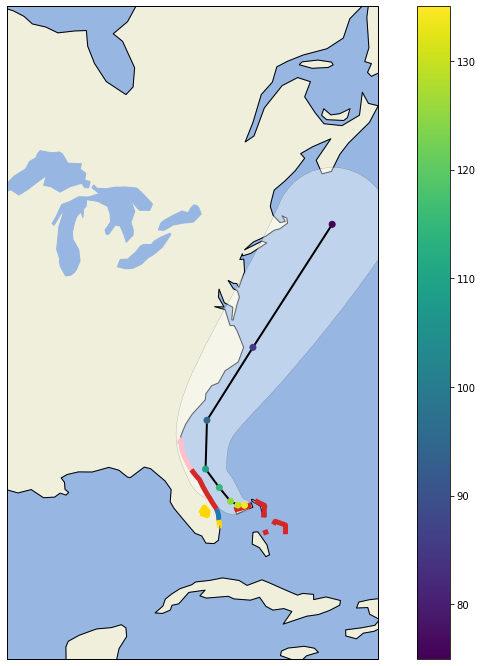

In [4]:
fig = plt.figure(figsize=(14, 12))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-90, -72, 20, 55])

ax.add_feature(cfeat.COASTLINE)
#ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAKES)
#ax.add_feature(cfeat.OCEAN.with_scale('50m'))

ax.add_geometries(cone_gdf['geometry'], crs=data_crs, facecolor='white',
                 edgecolor='black', linewidth=0.25, alpha=0.4)
ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2)
sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
                 zorder=10, c=points_gdf['MAXWIND'])

ww_colors = {'TWA': 'gold',
             'HWA': 'pink',
             'TWR': 'tab:blue',
             'HWR': 'tab:red'}
for ww_type in ww_colors.keys():
    ww_subset = ww_gdf[ww_gdf['TCWW']==ww_type]
    ax.add_geometries(ww_subset['geometry'], facecolor='none',
                     edgecolor=ww_colors[ww_type], crs=data_crs,
                     linewidth=5)
plt.colorbar(sc)



In [5]:
track_line_gdf = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_lin.shp')
cone_gdf       = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_pgn.shp')
points_gdf     = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_5day_pts.shp')
ww_gdf         = geopandas.read_file('laura_shape_files/al132020_5day_011/al132020-011_ww_wwlin.shp')

init_radii_gdf = geopandas.read_file('laura_shape_files/al132020_fcst_011/al132020_2020082215_initialradii.shp')
fcst_radii_gdf = geopandas.read_file('laura_shape_files/al132020_fcst_011/al132020_2020082215_forecastradii.shp')

best_track_points_gdf = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_pts.shp')
best_track_line_gdf   = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_lin.shp')
best_track_radii_gdf  = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_radii.shp')
best_track_swath_gdf  = geopandas.read_file('laura_shape_files/al132020_best_track/AL132020_windswath.shp')

wsp_34_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp34knt120hr_halfDeg.shp')
wsp_50_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp50knt120hr_halfDeg.shp')
wsp_64_gdf = geopandas.read_file('laura_shape_files/wsp_120hrhalfDeg_latest/2021071912_wsp64knt120hr_halfDeg.shp')





/home/jmedinah/miniconda3/envs/unidata/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


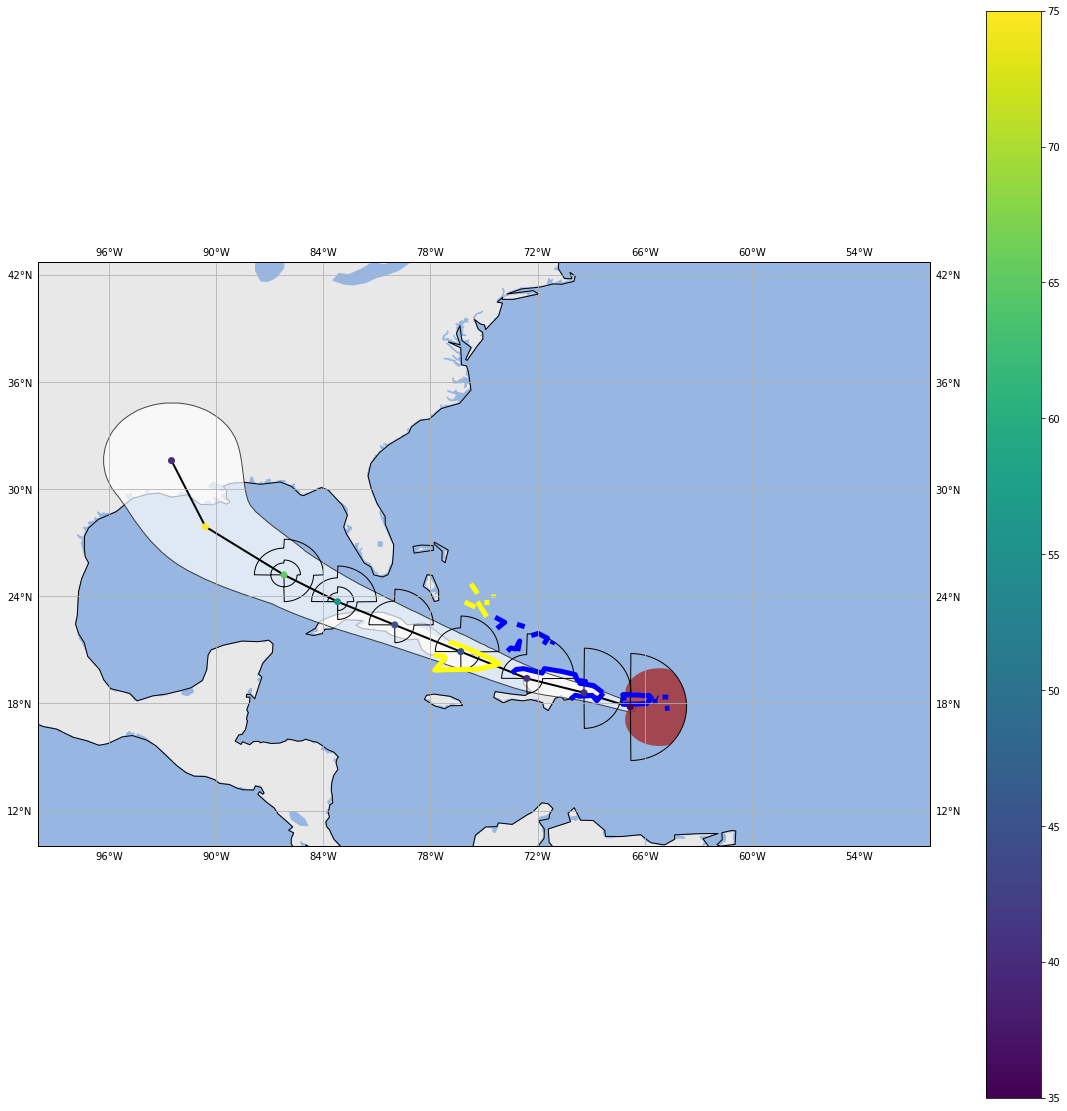

In [9]:
map_crs = ccrs.PlateCarree()
data_crs   = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 20))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-100, -50, 10, 40])

ax.add_feature(cfeat.COASTLINE)
#ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND, color = 'lightgray', alpha = 0.5)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAKES)
ax.add_feature(cfeat.OCEAN.with_scale('50m'))

ax.add_geometries(cone_gdf['geometry'], crs=data_crs, facecolor='white',
                 edgecolor='black', linewidth=1, alpha=0.7)
ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2)
sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
                zorder=10, c=points_gdf['MAXWIND'])

ax.add_geometries(init_radii_gdf['geometry'], crs=data_crs, facecolor='brown',
                 edgecolor='none', linewidth=0.1, alpha=0.8)
ax.add_geometries(fcst_radii_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=1)


ww_colors = {'TWA': 'yellow',
             'HWA': 'pink',
             'TWR': 'blue',
             'HWR': 'tab:red'}

for ww_type in ww_colors.keys():
    ww_subset = ww_gdf[ww_gdf['TCWW']==ww_type]
    ax.add_geometries(ww_subset['geometry'], facecolor='none',
                     edgecolor=ww_colors[ww_type], crs=data_crs,
                     linewidth=5)
plt.colorbar(sc)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER



In [7]:
# ax.add_geometries(best_track_points_gdf['geometry'],crs=data_crs,
#                  zorder=10)
ax.add_geometries(best_track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2, c=best_track_line_gdf['STORMTYPE'])

ax.scatter(best_track_points_gdf['LON'], best_track_points_gdf['LAT'],transform=data_crs,
                 zorder=10, c=best_track_points_gdf['INTENSITY'])




# ax.add_geometries(wsp_34_gdf['geometry'], crs=data_crs, facecolor='red',
#                   edgecolor='black')
fig


TypeError: 'Series' objects are mutable, thus they cannot be hashed

<Figure size 1440x1440 with 1 Axes>

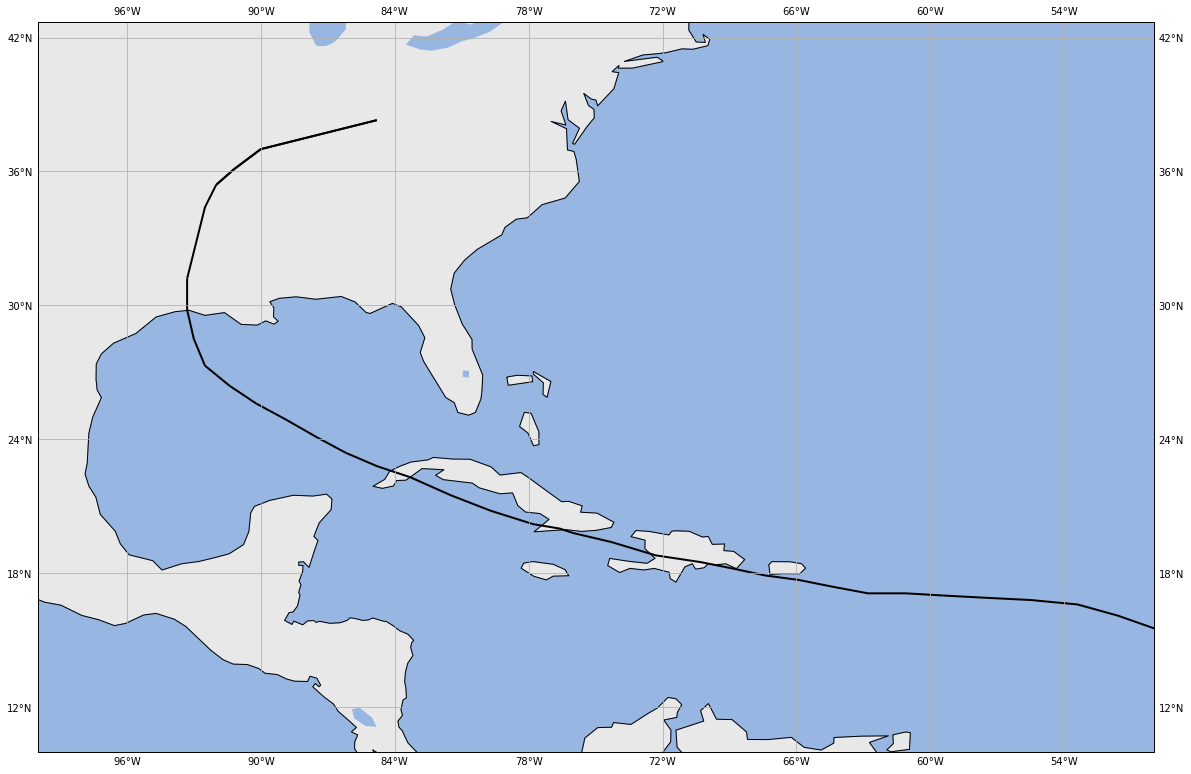

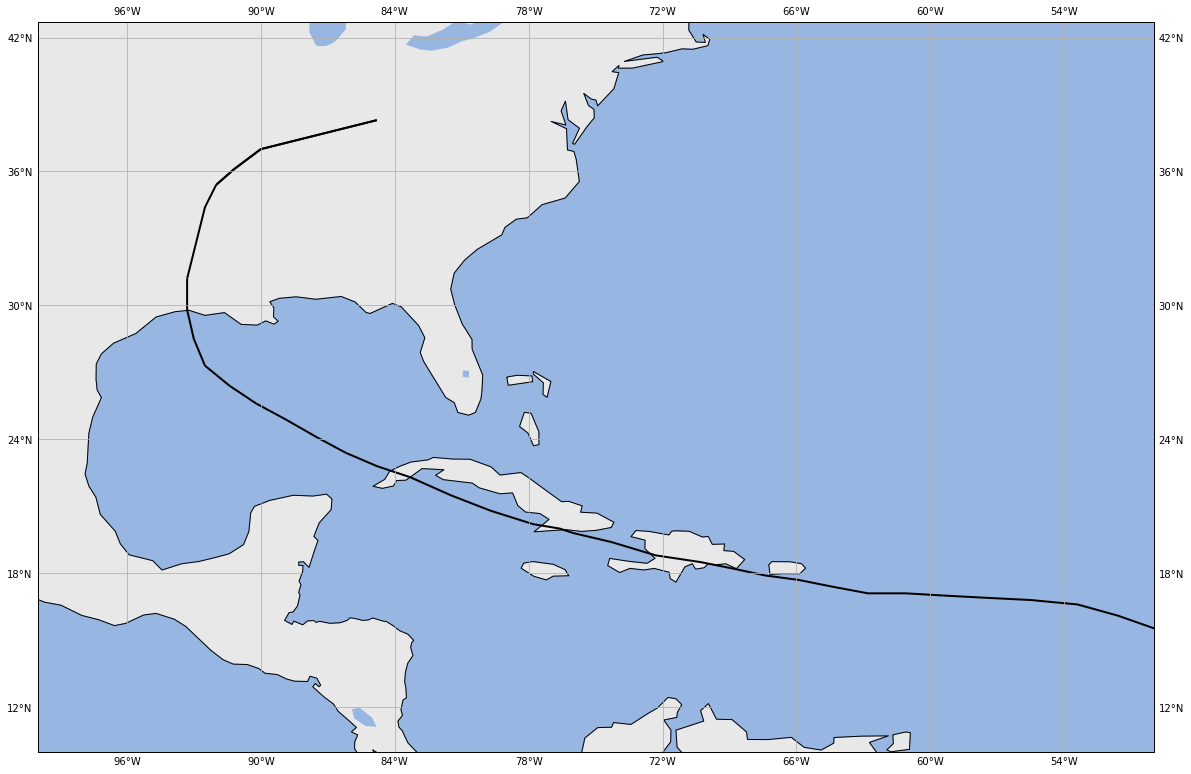

In [8]:
map_crs = ccrs.PlateCarree()
data_crs   = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 20))
ax = plt.subplot(1, 1, 1, projection = map_crs)
ax.set_extent([-100, -50, 10, 40])

ax.add_feature(cfeat.COASTLINE)
#ax.add_feature(cfeat.STATES)
ax.add_feature(cfeat.LAND, color = 'lightgray', alpha = 0.5)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.LAKES)
#ax.add_feature(cfeat.OCEAN.with_scale('50m'))

# ax.add_geometries(cone_gdf['geometry'], crs=data_crs, facecolor='white',
#                  edgecolor='black', linewidth=1, alpha=0.7)
# ax.add_geometries(track_line_gdf['geometry'], crs=data_crs, facecolor='none',
#                  edgecolor='black', linewidth=2)
# sc = ax.scatter(points_gdf['LON'], points_gdf['LAT'],transform=data_crs,
#                 zorder=10, c=points_gdf['MAXWIND'])

# ax.add_geometries(init_radii_gdf['geometry'], crs=data_crs, facecolor='brown',
#                  edgecolor='none', linewidth=0.1, alpha=0.8)
# ax.add_geometries(fcst_radii_gdf['geometry'], crs=data_crs, facecolor='none',
#                  edgecolor='black', linewidth=1)


# ww_colors = {'TWA': 'yellow',
#              'HWA': 'pink',
#              'TWR': 'blue',
#              'HWR': 'tab:red'}

# for ww_type in ww_colors.keys():
#     ww_subset = ww_gdf[ww_gdf['TCWW']==ww_type]
#     ax.add_geometries(ww_subset['geometry'], facecolor='none',
#                      edgecolor=ww_colors[ww_type], crs=data_crs,
#                      linewidth=5)
#plt.colorbar(sc)

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER






# ax.add_geometries(best_track_points_gdf['geometry'],crs=data_crs,
#                  zorder=10)
ax.add_geometries(best_track_line_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=2)


# ax.add_geometries(wsp_34_gdf['geometry'], crs=data_crs, facecolor='red',
#                   edgecolor='black')
fig
